This notebook is used for an exercise on the linear regression model in Python.

In [1]:
# Create a synthetic dataset for linear regression analysis
import numpy as np
import pandas as pd

np.random.seed(42)
rows = 1000

X1 = np.random.normal(10, 2, rows)          # strong positive correlation
X2 = np.random.normal(-5, 3, rows)          # strong negative correlation
X3 = np.random.normal(2, 1, rows)           # random/noise
# Linear relationship: Y = 2*X1 - 1.5*X2 + 0.3*X3 + noise
noise = np.random.normal(0, 2, rows)
Y = 2*X1 - 1.5*X2 + 0.3*X3 + noise

df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'Y': Y
})

df.to_csv('linear_regression_data.csv', index=False)


__Predictors__

X1: 1000 samples from a normal distribution with mean 10 and standard deviation 2. This variable is intended to have a strong positive correlation with the target.

X2: 1000 samples with mean -5 and standard deviation 3. This variable will have a strong negative correlation with the target.

X3: 1000 samples with mean 2 and standard deviation 1. This is a noise/random predictor with minimal effect.

In [8]:
# collect the data
data = pd.read_csv('linear_regression_data.csv')
data.rename(columns={"X1": "mktg_spend", "X2": "competitors", "X3": "temperature_change", "Y": "sales"}, inplace=True)
data.head()

,mktg_spend,competitors,temperature_change,sales
0,10.993428,-0.801934,1.324822,19.771589
1,9.723471,-2.226099,1.855481,21.621966
2,11.295377,-4.821109,1.207580,29.357480
3,13.046060,-6.940810,1.692038,40.786322
4,9.531693,-2.905330,0.106385,24.566403


In [9]:
# explore the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mktg_spend          1000 non-null   float64
 1   competitors         1000 non-null   float64
 2   temperature_change  1000 non-null   float64
 3   sales               1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [10]:
data.describe()

,mktg_spend,competitors,temperature_change,sales
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.038664,-4.787491,2.005834,27.822877
std,1.958432,2.992363,0.983454,6.489819
min,3.517465,-13.821166,-1.019512,10.227539
25%,8.704819,-6.818725,1.352000,23.131923
50%,10.050601,-4.810769,1.999749,27.647658
75%,11.295888,-2.813353,2.660915,32.531027
max,17.705463,4.579323,5.926238,46.402403


<Axes: xlabel='mktg_spend', ylabel='sales'>

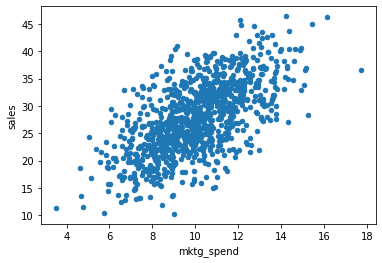

In [15]:
%matplotlib inline
data.plot(kind = 'scatter', x = 'mktg_spend', y = 'sales')

<Axes: xlabel='competitors', ylabel='sales'>

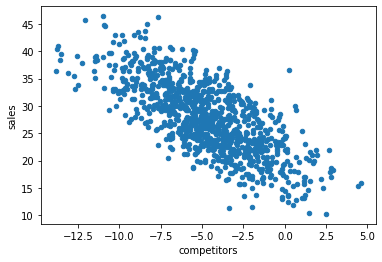

In [16]:
%matplotlib inline
data.plot(kind = 'scatter', x = 'competitors', y = 'sales')

<Axes: xlabel='temperature_change', ylabel='sales'>

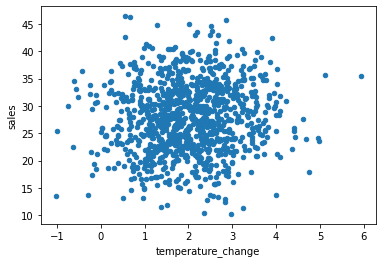

In [ ]:
%matplotlib inline
data.plot(kind = 'scatter', x = 'temperature_change', y = 'sales')

In [19]:
# Prepare the data for modeling
# Select the response variable
response = 'sales'
y = data[[response]]
y

,sales
0,19.771589
1,21.621966
2,29.357480
3,40.786322
4,24.566403
...,...
995,22.240082
996,31.331794
997,33.618684
998,29.936095
